In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
import os
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
img = cv2.imread('source//document.jpg')

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(<Axes: >, <matplotlib.image.AxesImage at 0x2bed7eefc20>)

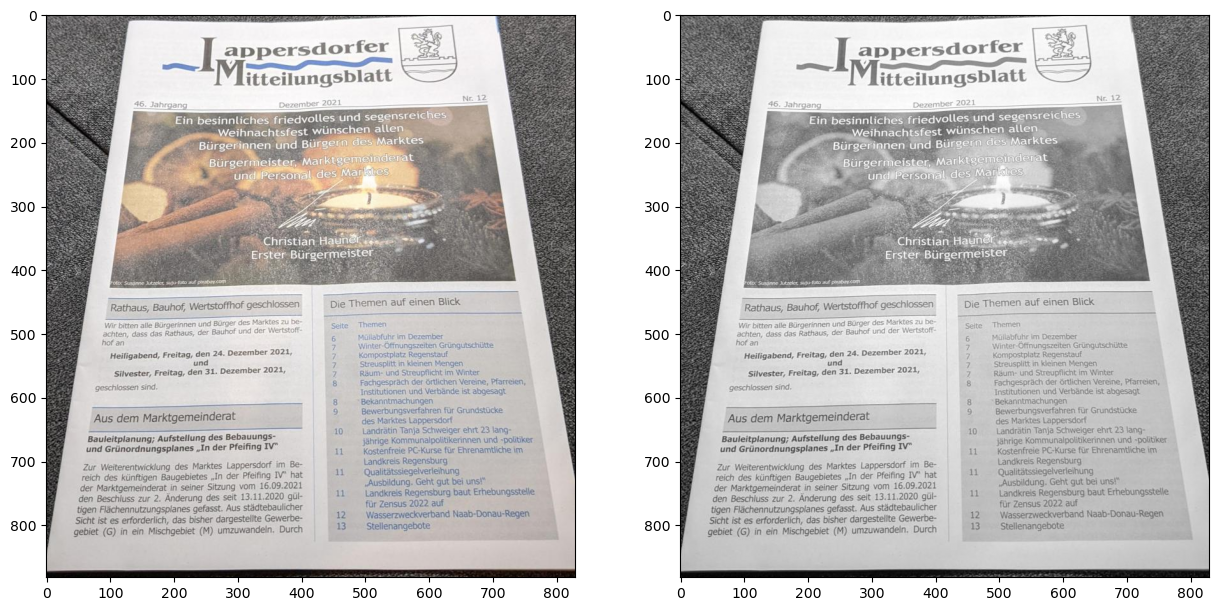

In [4]:
# Let's plot the image
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(gray, cmap='gray')

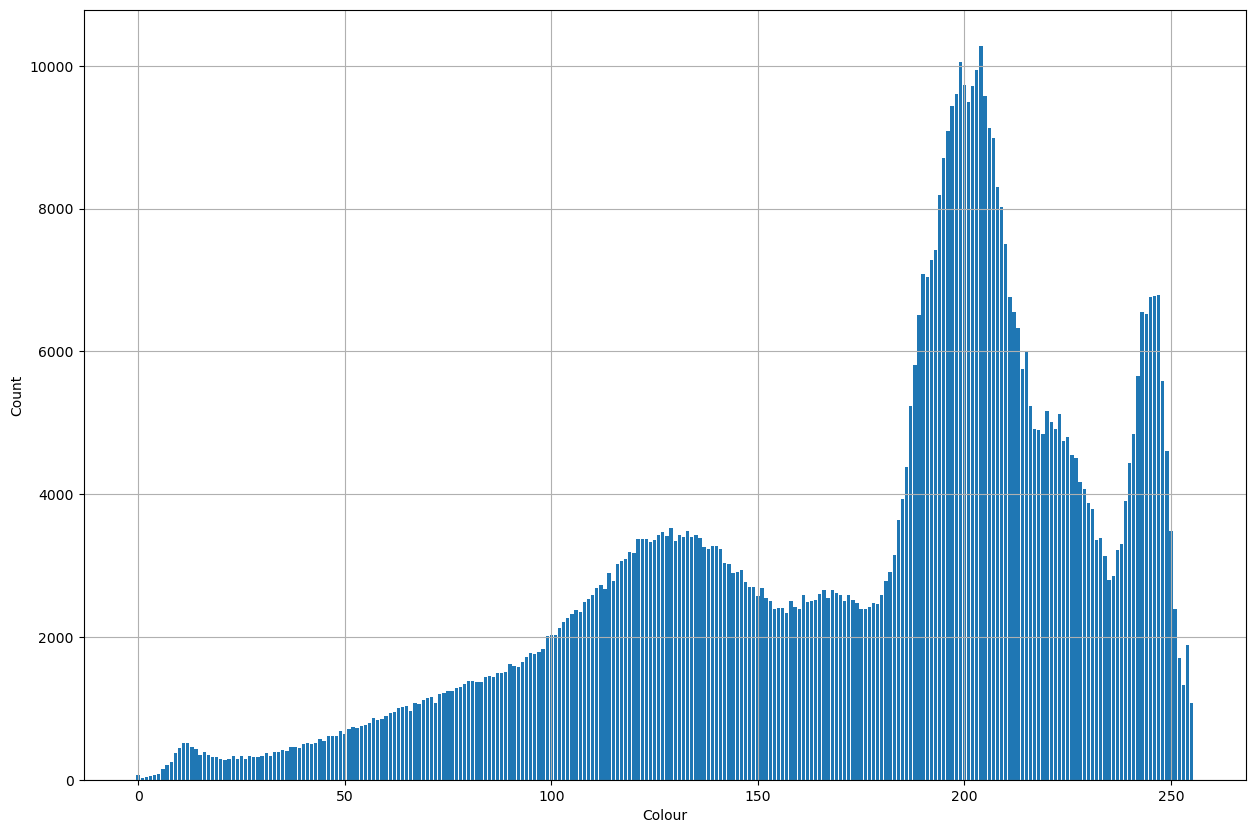

In [5]:
#First, let's have a look at the histogram.
h = np.histogram(gray.ravel(), bins=256, range=(0, 256))
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

Otsu Thresholding
Let's now implement the Otsu thresholding algorithm. 
Remember that the algorithm consists of an optimization process that finds the thresholds 
that minimizes the intra-class variance or, equivalently, maximizes the inter-class variance.

In this homework, you are going to demonstrate the working principle of the Otsu algorithm. 
Therefore, you won't have to worry about an efficient implementation, 
we are going to use the brute force approach here.

In [6]:
# Get image dimensions
rows, cols = gray.shape
# Compute the total amount of image pixels
num_pixel = rows * cols

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

In [7]:
# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    # Extract the image pixels corresponding to the foreground
    foreground = gray[gray >= th]
    # Extract the image pixels corresponding to the background
    background = gray[gray < th]
    
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class-weights (omega parameters) for foreground and background
    omega_f = len(foreground) / num_pixel
    omega_b = len(background) / num_pixel
    
    # Compute pixel variance for foreground and background (var function from numpy)
    # https://numpy.org/doc/stable/reference/generated/numpy.var.html
    sigma2_f = np.var(foreground)
    sigma2_b = np.var(background)
    
    # Compute the within-class variance
    wcv = omega_f * sigma2_f + omega_b * sigma2_b
    
    # Perform the optimization
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th
        
# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)

Optimal threshold 160


Finally, let's compare the original image and its thresholded representation.

(np.float64(-0.5), np.float64(828.5), np.float64(881.5), np.float64(-0.5))

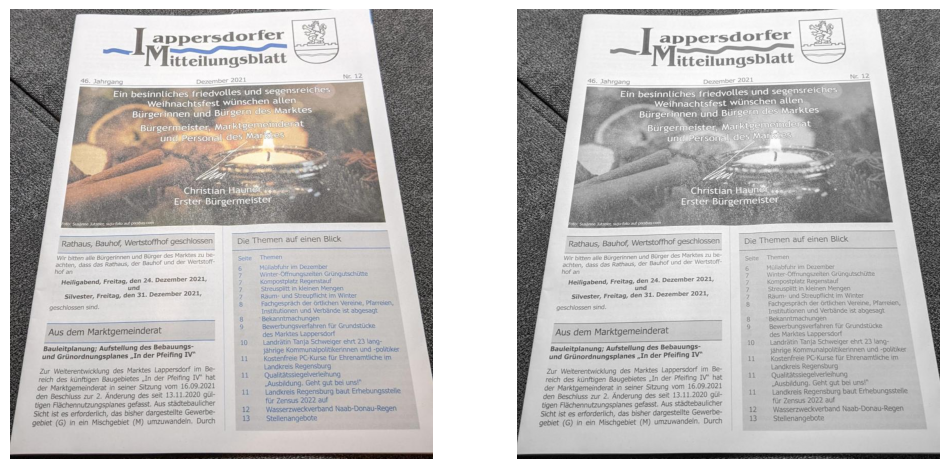

In [8]:
# 1. Застосовуємо поріг до зображення у відтінках сірого ('gray')
# 2. Перетворюємо булевий масив (True/False) у числовий (1/0) типу uint8
binary_image = ((gray > opt_th).astype(np.uint8)) * 255  # 0/255 для коректного відображення/збереження

# --- Report (4 panels) у простому форматі subplot(221..224) ---
plt.figure(figsize=(12, 9))

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off')
plt.subplot(122), plt.imshow(gray, cmap='gray'); plt.axis('off')

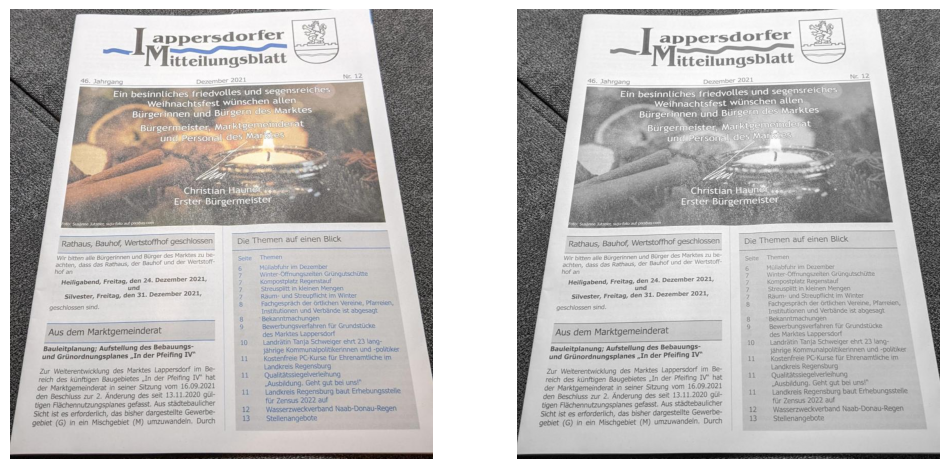

Text(0.5, 1.0, 'Thresholded Image (th=160)')

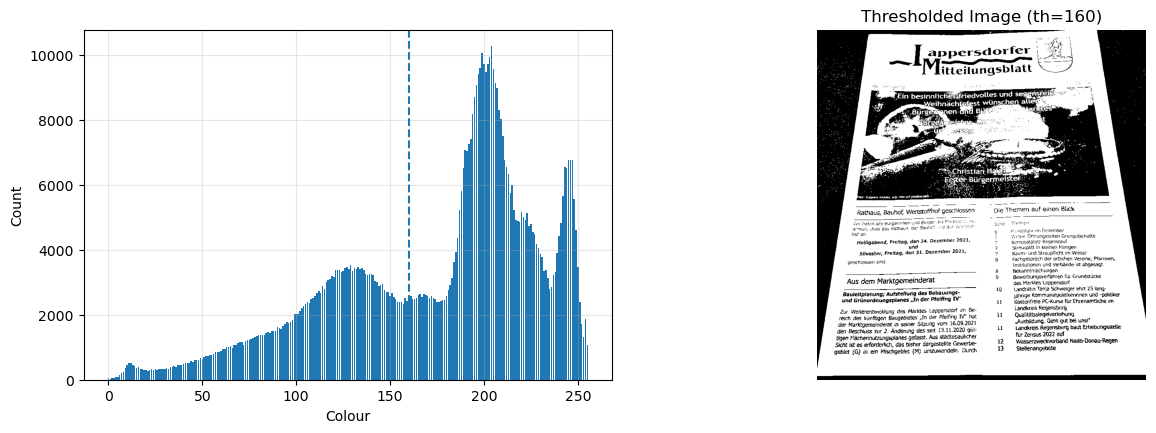

In [9]:
plt.figure(figsize=(12, 9))

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off')
plt.subplot(122), plt.imshow(gray, cmap='gray'); plt.axis('off')
plt.show()

plt.subplot(223)
plt.bar(h[1][0:-1], h[0])
plt.axvline(opt_th, linestyle='--')  # вертикальна лінія порога
plt.xlabel('Colour')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.subplot(224), plt.imshow(binary_image, cmap='gray'); plt.axis('off')
plt.title(f'Thresholded Image (th={opt_th})')